<a href="https://colab.research.google.com/github/bathini2458/traffic-signs-recognition/blob/main/Trafficsign41_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Cloning  the dataset

In [10]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), 117.80 MiB | 9.88 MiB/s, done.
Updating files: 100% (4/4), done.


In [11]:
!ls german-traffic-signs/

signnames.csv  test.p  train.p	valid.p


##importing all Required libraries

In [12]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import pickle
import random
import pandas as pd
import cv2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

##importing the data set

In [13]:
import pandas as pd
df = pd.read_csv('german-traffic-signs/signnames.csv')
df.head(5)

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


## Load Train,Test the Dataset

In [14]:
np.random.seed(0)
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    valid_data = pickle.load(f)

In [15]:
train_x, train_y = train_data['features'],train_data['labels']
val_x, val_y = valid_data['features'],valid_data['labels']
test_x,test_y = test_data['features'],test_data['labels']

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import os
num_samples = []
for i in range(len(df)):
    file_count = len(os.listdir('/content/drive/MyDrive/Train/'+str(i)+'/'))
    num_samples.append(file_count)
print(len(num_samples))

43


## Data Visualization

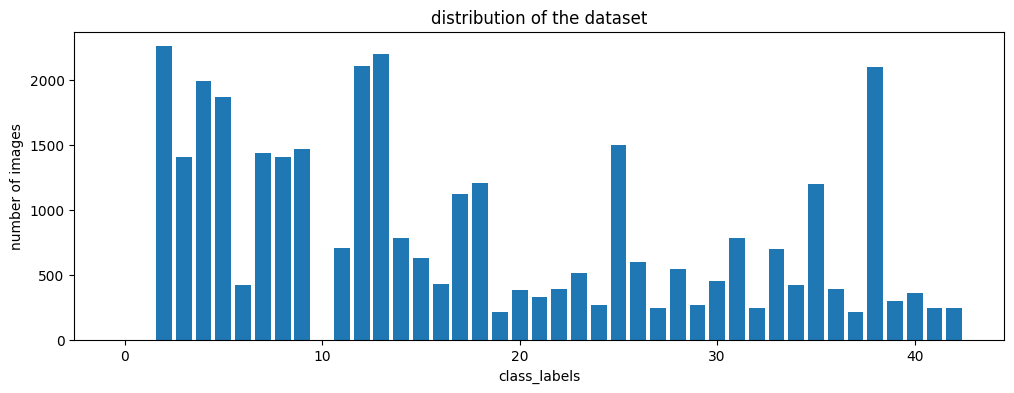

In [18]:
plt.figure(figsize=(12,4))
plt.bar(range(0, len(df)), num_samples)
plt.title('distribution of the dataset')
plt.xlabel('class_labels')
plt.ylabel('number of images')
plt.show()

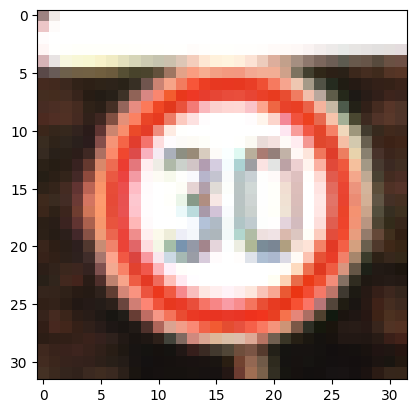

In [19]:
plt.imshow(train_x[3000])


## Convert the image to grayscale
because- Reason to convert to grayscale is, for traffic sign identification, color is not necessary, only edges and shapes are required

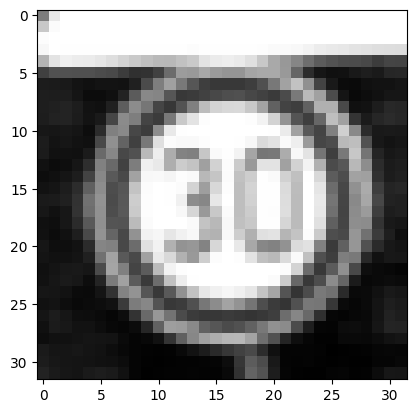

In [20]:
def grayscale(image):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    return image

img = grayscale(train_x[3000])
plt.imshow(img, cmap = plt.get_cmap('gray'))

### Use histogram equalization technique to standardize contrast/light in all images

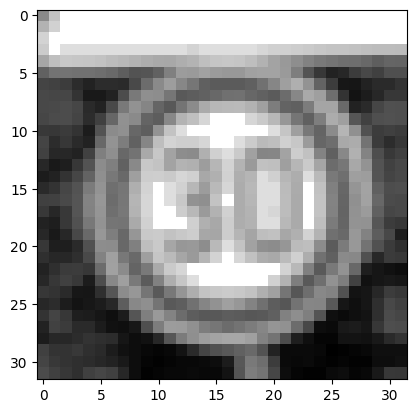

In [21]:
def equalize(image):
    image = cv2.equalizeHist(image)
    return image
img = equalize(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [22]:
def processing(image):
    gray_img = grayscale(image)
    img = equalize(gray_img)
    img = img/255
    return img

## Convert all train, test and validation dataset to grayscale & histogram technique

In [23]:
train_x = np.asarray(list(map(processing, train_x)))
val_x = np.asarray(list(map(processing, val_x)))
test_x = np.asarray(list(map(processing, test_x)))

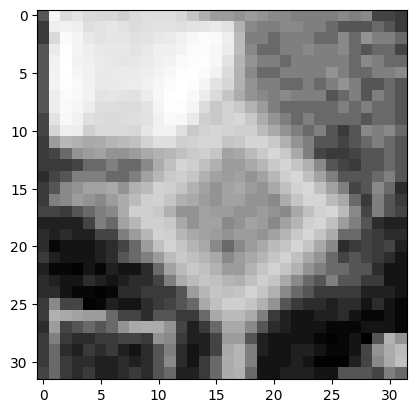

In [24]:
plt.imshow(train_x[random.randint(0, len(train_x-1))],cmap=plt.get_cmap('gray'))

In [25]:
train_x = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
val_x = val_x.reshape(val_x.shape[0],val_x.shape[1],val_x.shape[2],1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1],test_x.shape[2],1)


## Generate the  dataset with different angles using Keras Imagedatagenerator

In [26]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)
datagen.fit(train_x)



## One-hot encode the labels

In [27]:
train_y = to_categorical(train_y,43)
test_y = to_categorical(test_y,43)
val_y = to_categorical(val_y,43)

## Defining the  the model

In [28]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, ReLU, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.tree import DecisionTreeClassifier
def build_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(60, (5, 5), input_shape=input_shape))
    model.add(ReLU())
    model.add(Conv2D(60, (5, 5)))
    model.add(ReLU())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(30, (3, 3)))
    model.add(ReLU())
    model.add(Conv2D(30, (3, 3)))
    model.add(ReLU())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [29]:
 batch_size = 64
 steps_per_epoch = 20
cnn_model = build_cnn_model(train_x.shape[1:], len(df['ClassId']))
history = cnn_model.fit(train_x, train_y, batch_size=batch_size, epochs=15, validation_data=(val_x, val_y), shuffle=1, steps_per_epoch=steps_per_epoch)


Epoch 1/15
20/20 [==============================] - 25s 1s/step - loss: 3.5917 - accuracy: 0.0531 - val_loss: 3.6125 - val_accuracy: 0.0823
Epoch 2/15
20/20 [==============================] - 33s 2s/step - loss: 3.5096 - accuracy: 0.0672 - val_loss: 3.5080 - val_accuracy: 0.0964
Epoch 3/15
20/20 [==============================] - 33s 2s/step - loss: 3.3603 - accuracy: 0.1273 - val_loss: 3.1001 - val_accuracy: 0.2537
Epoch 4/15
20/20 [==============================] - 33s 2s/step - loss: 2.6148 - accuracy: 0.3227 - val_loss: 2.0563 - val_accuracy: 0.4608
Epoch 5/15
20/20 [==============================] - 33s 2s/step - loss: 1.8240 - accuracy: 0.4906 - val_loss: 1.5691 - val_accuracy: 0.5236
Epoch 6/15
20/20 [==============================] - 33s 2s/step - loss: 1.4677 - accuracy: 0.5805 - val_loss: 1.1238 - val_accuracy: 0.6714
Epoch 7/15
20/20 [==============================] - 33s 2s/step - loss: 1.1241 - accuracy: 0.6594 - val_loss: 0.9226 - val_accuracy: 0.7304
Epoch 8/15
20/20 [==

Text(0, 0.5, 'loss')

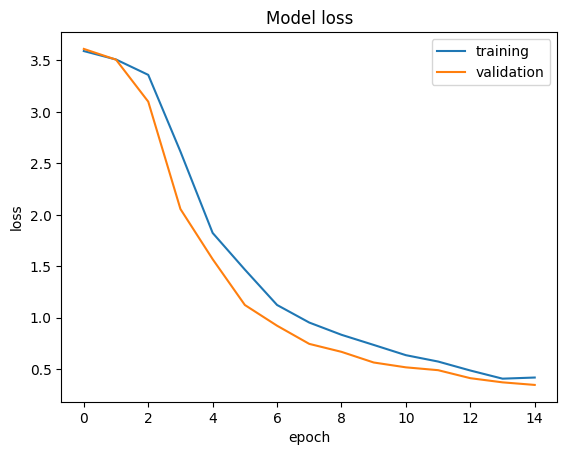

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')

## inputing fearures to machine learning Models..

In [31]:

# extract features from the CNN model
cnn_train_features = cnn_model.predict(train_x)
cnn_val_features = cnn_model.predict(val_x)

138/138 [==============================] - 12s 85ms/step


In [35]:
#Training Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(cnn_train_features, np.argmax(train_y, axis=1))
accuracy1 = decision_tree.score(cnn_val_features, np.argmax(val_y, axis=1))
print(f"Decision Tree Accuracy: {accuracy1}")

# Training  Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(cnn_train_features, np.argmax(train_y, axis=1))
accuracy2 = random_forest.score(cnn_val_features, np.argmax(val_y, axis=1))
print(f"Random Forest Accuracy: {accuracy2}")

# Training Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(cnn_train_features, np.argmax(train_y, axis=1))
accuracy3 = logistic_regression.score(cnn_val_features, np.argmax(val_y, axis=1))
print(f"Logistic Regression Accuracy: {accuracy3}")

# Training SVM
svm_classifier = SVC()
svm_classifier.fit(cnn_train_features, np.argmax(train_y, axis=1))
accuracy4 = svm_classifier.score(cnn_val_features, np.argmax(val_y, axis=1))
print(f"SVM Accuracy: {accuracy4}")


Decision Tree Accuracy: 0.8891156462585034
Random Forest Accuracy: 0.919047619047619
Logistic Regression Accuracy: 0.9079365079365079
SVM Accuracy: 0.9136054421768708


##Graph for training Accurancy

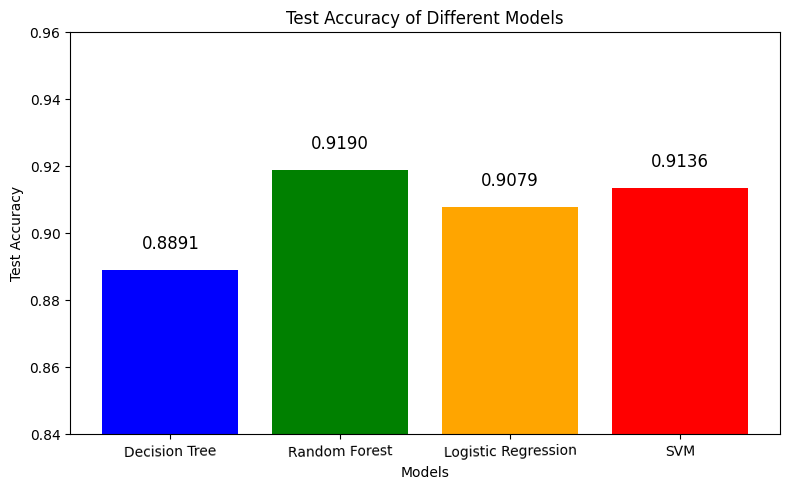

In [42]:
import matplotlib.pyplot as plt

# Define the test accuracies for each model (replace with actual values)
accuracies = [accuracy1, accuracy2, accuracy3, accuracy4]

# List of model names
models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM']

# Creating a bar plot
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy of Different Models')
plt.ylim(0.84, 0.96)
plt.xticks(rotation=1)

# Adding accuracy values on the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.005, f'{accuracy:.4f}', ha='center', va='bottom', fontsize=12)

# Display the graph
plt.tight_layout()
plt.show()


##Evaluate the model with test data

In [44]:
#Decision Tree on the test data
decision_tree_test_accuracy = decision_tree.score(cnn_model.predict(test_x), np.argmax(test_y, axis=1))
print(f"Decision Tree Test Accuracy: {decision_tree_test_accuracy}")

# Random Forest on the test data
random_forest_test_accuracy = random_forest.score(cnn_model.predict(test_x), np.argmax(test_y, axis=1))
print(f"Random Forest Test Accuracy: {random_forest_test_accuracy}")

# Logistic Regression on the test data
logistic_regression_test_accuracy = logistic_regression.score(cnn_model.predict(test_x), np.argmax(test_y, axis=1))
print(f"Logistic Regression Test Accuracy: {logistic_regression_test_accuracy}")

# SVM on the test data
svm_test_accuracy = svm_classifier.score(cnn_model.predict(test_x), np.argmax(test_y, axis=1))
print(f"SVM Test Accuracy: {svm_test_accuracy}")


395/395 [==============================] - 36s 92ms/step
Decision Tree Test Accuracy: 0.8747426761678543
395/395 [==============================] - 36s 90ms/step
Random Forest Test Accuracy: 0.9029295328582739
395/395 [==============================] - 36s 92ms/step
Logistic Regression Test Accuracy: 0.8950118764845606
395/395 [==============================] - 36s 90ms/step
SVM Test Accuracy: 0.8967537608867775


##Graph for Testing accuarncy

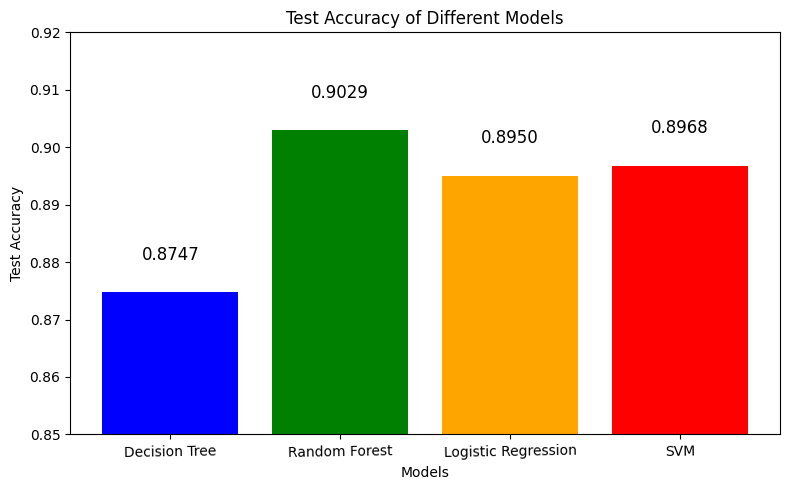

In [45]:
import matplotlib.pyplot as plt

# Test accuracies
models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM']
accuracies = [decision_tree_test_accuracy, random_forest_test_accuracy, logistic_regression_test_accuracy, svm_test_accuracy]

# Creating a bar plot
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy of Different Models')
plt.ylim(0.85, 0.92)
plt.xticks(rotation=1)

# Adding accuracy values on the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.005, f'{accuracy:.4f}', ha='center', va='bottom', fontsize=12)

# Display the graph
plt.tight_layout()
plt.show()


##Testing the model using an external traffic sign image

1/1 [==============================] - 0s 101ms/step
The predicted traffic sign class is: Turn right ahead


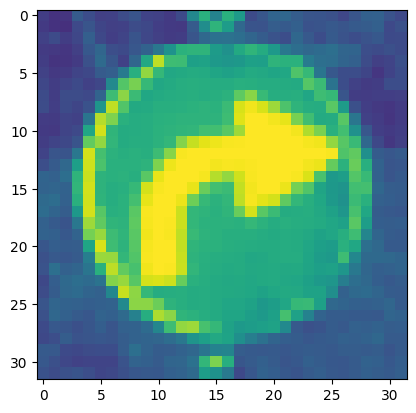

In [46]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = Image.open('/content/Rightside test.png')
img = np.asarray(img)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = cv2.resize(img_gray, (32, 32))
img_gray = img_gray.reshape(1, 32, 32, 1)
class_probabilities = cnn_model.predict(img_gray)
predicted_class = np.argmax(class_probabilities)
print('The predicted traffic sign class is:', df['SignName'][predicted_class])
cmap = plt.get_cmap('viridis')
img_color = cmap(img_gray[0, :, :, 0])
plt.imshow(img_color)
plt.show()



#Conclusion:
Here we done this Project (Traffic Sign Recognition ) using Hybrid Model i.e Combination of CNN with Traditional Machine learning models
  -->CNN-To Extract the features of Image
  -->ML Models-Input from CNN ,and which gives Traffic sign Classification as Output.
and in this project CNN with Random Forest gives better accurancy.